<a href="https://colab.research.google.com/github/Nannanpeng/Macro-I/blob/main/HW2_Q4_and_Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/My Drive/Macro_I")

Mounted at /content/drive


# Question 4
Finite periods with instantaneous utility function $u(c) = ln(c)$

In [ ]:
a_0 = 0
T = 69 
S = T+1 # from 0 to T. So T + 1 periods in total
beta = 1
R = np.ones(S)
cmax = 2
grid = 10000

w = np.zeros(S)
w[:10] = 0.25
w[10:50] = 1
w[50:] = 0 

In [ ]:
(0.25*10+1*40+20*0.5)/70

0.75

In [ ]:
def compute_consumption_savings(c_0, Ws, Rs, tot_p = S, a0 = a_0, beta_ = beta):
    store_a = np.zeros(tot_p + 1)
    store_a[0] = a0
    store_c = np.zeros_like(Ws)
    store_c[0] = c_0
    for i in range(1, tot_p):
        store_a[i] = Ws[i-1] + Rs[i-1]*store_a[i-1] - store_c[i-1]
        store_c[i] = beta_*Rs[i]*store_c[i-1]
    store_a[-1] = Ws[-1] + Rs[-1]*store_a[-2] - store_c[-1] # final period savings a_{T+1}
    return store_a[-1], store_c, store_a 

def find_consumption_savings_path(c_init_grids, Ws, Rs=R):
    a_final_grids = np.array([ compute_consumption_savings(c0, Ws, Rs=Rs)[0] for c0 in c_init_grids])
    ind = np.argmin( np.abs(a_final_grids) )
    c0 = c0_grids[ind]
    _, c_path, a_path = compute_consumption_savings(c_0 = c0, Ws=Ws, Rs=Rs)
    return c_path, a_path

### Case 1: No retirement income 

In [ ]:
c0_grids = np.linspace(0, cmax, grid)
c_path_1, a_path_1 = find_consumption_savings_path(c0_grids, w)

### Case 2: Retirement income

In [ ]:
w_new = np.copy(w)
w_new[50:] = 0.5
c_path_2, a_path_2 = find_consumption_savings_path(c0_grids, w_new)

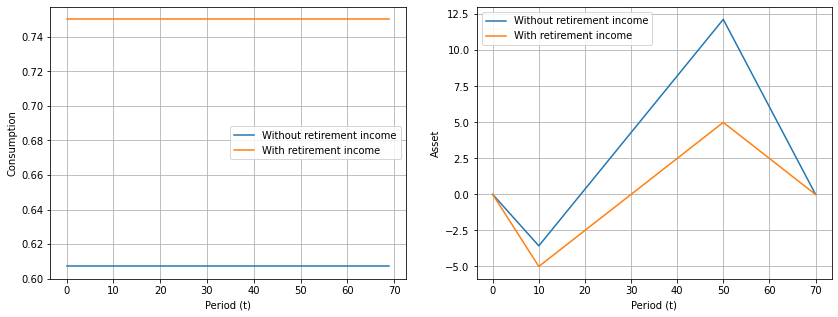

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
consum_save_paths = [ [c_path_1, c_path_2],  
                      [a_path_1, a_path_2] ]
labels = ['Without retirement income', 'With retirement income']
ytitles = ['Consumption', 'Asset']
for ax, consum_save, ytitle in zip(axes, consum_save_paths, ytitles):
    for path, label in zip(consum_save, labels):
        ax.plot(path, label=label)
    ax.grid()
    ax.legend()
    ax.set(xlabel='Period (t)', ylabel=ytitle);

fig.savefig('HW2_Q4.png', dpi=1200)

### Case 3: tax in working periods

In [ ]:
w_tax = np.copy(w_new)
w_tax[10:50] = 0.75
c_path_3, a_path_3 = find_consumption_savings_path(c0_grids, w_tax)

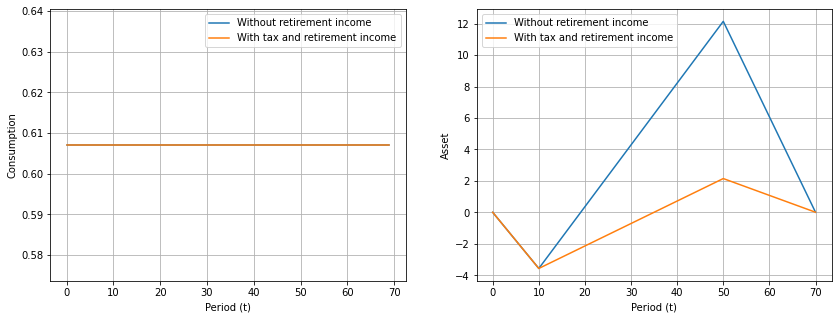

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
consum_save_paths = [ [c_path_1, c_path_3],  
                      [a_path_1, a_path_3] ]
labels = ['Without retirement income', 'With tax and retirement income']
ytitles = ['Consumption', 'Asset']
for ax, consum_save, ytitle in zip(axes, consum_save_paths, ytitles):
    for path, label in zip(consum_save, labels):
        ax.plot(path, label=label)
    ax.grid()
    ax.legend()
    ax.set(xlabel='Period (t)', ylabel=ytitle);

fig.savefig('HW2_Q5.png', dpi=1200)

### Case 4: different interest rate

In [ ]:
R_new = np.zeros_like(R)
R_new[:] = 1.02
c_path_1_Rnew, a_path_1_Rnew = find_consumption_savings_path(c0_grids, w, R_new)
c_path_3_Rnew, a_path_3_Rnew = find_consumption_savings_path(c0_grids, w_tax, R_new)

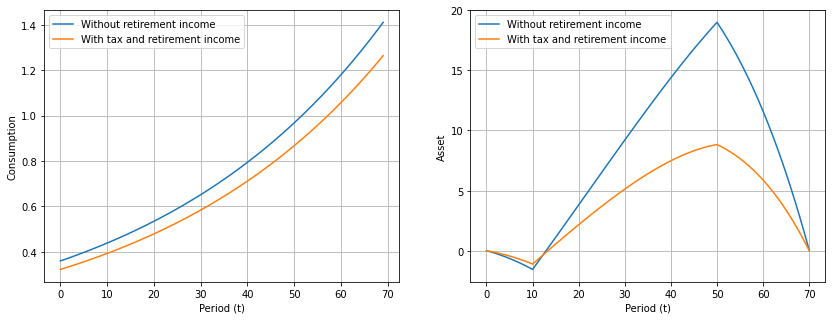

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
consum_save_paths = [ [c_path_1_Rnew, c_path_3_Rnew],  
                      [a_path_1_Rnew, a_path_3_Rnew] ]
labels = ['Without retirement income', 'With tax and retirement income']
ytitles = ['Consumption', 'Asset']
for ax, consum_save, ytitle in zip(axes, consum_save_paths, ytitles):
    for path, label in zip(consum_save, labels):
        ax.plot(path, label=label)
    ax.grid()
    ax.legend()
    ax.set(xlabel='Period (t)', ylabel=ytitle);

fig.savefig('HW2_Q5_bonus.png', dpi=1200)